cargo los datos del drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,4.5) # Make the default figures a bit bigger

import numpy as np
import random

#Let's make this notebook reproducible 
np.random.seed(42)
random.seed(42)

import pandas as pd
#from wikitables import import_tables #to download tables from the Wikipedia

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [ ]:
#cargamos datos 
train_1 = pd.read_csv("/content/drive/MyDrive/bigdata3/proyecto homicidios/categorizados.csv")


In [ ]:
train_1.head()

,Fecha,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo
0,08/12/2010 12:00:00 AM,29,2,0,0,4,0,0,18,1
1,2010-01-01 00:00:00,1,4,8,0,4,0,0,32,1
2,08/11/2010 12:00:00 AM,21,0,7,0,4,0,3,48,1
3,2010-01-01 00:00:00,9,0,23,0,4,0,0,26,1
4,2010-01-01 00:00:00,13,6,0,0,2,0,0,43,1


In [ ]:
#para la columna fecha
#convierto la columna Fecha a tipo fecha con to_datetime()
df = pd.to_datetime(train_1['Fecha'])
#cargo el train_1 en un dataframe para agregar la columna mes
train_1 = pd.DataFrame(train_1)
#agrego la columna mes al train_1
train_1['Mes'] = df.dt.month

#agrego la columna dia del año al train_1
train_1['dia_anio'] = df.dt.dayofyear

#agrego la columna semana del año al train_1
train_1['semana_anio'] = df.dt.weekofyear

train_1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  del sys.path[0]


,Fecha,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio
0,08/12/2010 12:00:00 AM,29,2,0,0,4,0,0,18,1,8,224,32
1,2010-01-01 00:00:00,1,4,8,0,4,0,0,32,1,1,1,53
2,08/11/2010 12:00:00 AM,21,0,7,0,4,0,3,48,1,8,223,32
3,2010-01-01 00:00:00,9,0,23,0,4,0,0,26,1,1,1,53
4,2010-01-01 00:00:00,13,6,0,0,2,0,0,43,1,1,1,53


In [ ]:
#borro la columnas fecha
# inplace, es equivalente a train_1=train_1
train_1.drop(labels=['Fecha'],axis=1,inplace=True)
train_1.head()

,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio
0,29,2,0,0,4,0,0,18,1,8,224,32
1,1,4,8,0,4,0,0,32,1,1,1,53
2,21,0,7,0,4,0,3,48,1,8,223,32
3,9,0,23,0,4,0,0,26,1,1,1,53
4,13,6,0,0,2,0,0,43,1,1,1,53


In [ ]:
train_1.head()

In [ ]:
#normalizo 
dat_norm=(train_1-train_1.min())/(train_1.max()-train_1.min())
dat_norm.head()

,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio
0,0.935484,0.333333,0.000000,0.0,0.111111,0.0,0.00,0.18,1.0,0.636364,0.610959,0.596154
1,0.032258,0.666667,0.347826,0.0,0.111111,0.0,0.00,0.32,1.0,0.000000,0.000000,1.000000
2,0.677419,0.000000,0.304348,0.0,0.111111,0.0,0.25,0.48,1.0,0.636364,0.608219,0.596154
3,0.290323,0.000000,1.000000,0.0,0.111111,0.0,0.00,0.26,1.0,0.000000,0.000000,1.000000
4,0.419355,1.000000,0.000000,0.0,0.055556,0.0,0.00,0.43,1.0,0.000000,0.000000,1.000000


In [ ]:
#codo de yambu para buscar la cantidad minima de clusters
wcss= []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, max_iter=300)
  kmeans.fit (dat_norm) #Aplico K-means a la base de datos
  wcss.append(kmeans.inertia_)

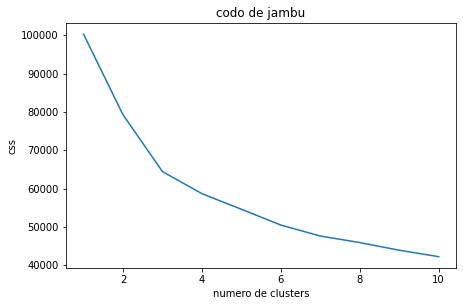

In [ ]:
#grafico la forma del codo
plt.plot(range(1, 11),wcss)
plt.title("codo de jambu")  
plt.xlabel("numero de clusters")
plt.ylabel("css")
plt.show()

In [ ]:
#ahora si uso kmeans para hacer la agrupacion, el cluster es el numero de agrupaciones
#que queremos obtener, el state es el numero aleatorio del cual va a arrancar

kmeans = KMeans(n_clusters=4, random_state=4)
kmeans.fit(dat_norm);

In [ ]:
train_1['Kmeans_cluster']=kmeans.labels_
train_1.head()

,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio,Kmeans_cluster
0,29,2,0,0,4,0,0,18,1,8,224,32,2
1,1,4,8,0,4,0,0,32,1,1,1,53,0
2,21,0,7,0,4,0,3,48,1,8,223,32,2
3,9,0,23,0,4,0,0,26,1,1,1,53,0
4,13,6,0,0,2,0,0,43,1,1,1,53,0


In [ ]:
#componentes principales, redusco las columnas para poderlas graficar en esta caso 2
pca = PCA(n_components=2)
components = pca.fit_transform(dat_norm)
components_df=pd.DataFrame(data=components,columns=['componente_1','componente_2'])
components_df['kmeans']=kmeans.labels_
components_df

,componente_1,componente_2,kmeans
0,0.259934,-0.294005,2
1,-0.282251,-0.210328,0
2,0.253496,-0.254578,2
3,-0.250234,-0.240879,0
4,-0.275666,-0.260866,0
...,...,...,...
102300,0.784952,-0.349659,2
102301,0.771530,-0.321005,2
102302,0.779968,0.647742,3
102303,0.778749,-0.330218,2


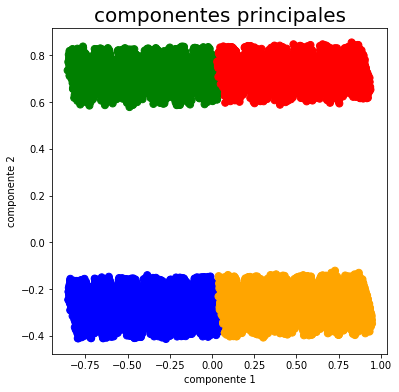

In [ ]:
#graficamos
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('componente 1',fontsize=10)
ax.set_ylabel('componente 2',fontsize=10)
ax.set_title('componentes principales',fontsize=20)

color_theme=np.array(['blue','green','orange','red'])
ax.scatter(x=components_df.componente_1,
           y=components_df.componente_2,
           c=color_theme[components_df.kmeans],s=50)

plt.show()

In [ ]:
#filtrar en pd
df=pd.DataFrame(train_1)
c2 = df[df.Kmeans_cluster.eq(2)]
c2.head()

,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio,Kmeans_cluster
0,29,2,0,0,4,0,0,18,1,8,224,32,2
2,21,0,7,0,4,0,3,48,1,8,223,32,2
110,23,3,12,0,2,0,0,67,1,11,315,45,2
5496,1,5,14,0,4,0,0,17,1,7,182,26,2
5498,21,2,20,0,4,0,3,45,1,7,182,26,2


In [ ]:

c2.to_csv('drive/MyDrive/bigdata3/proyecto homicidios/Agrupación_2.csv')

In [ ]:
df.groupby([df['Kmeans_cluster']]).agg({'count'})

,Departamento,Dia,HoraEstandarizada,Zona,Modalidad,Movil_Victima,Movil_Agresor,Edad,Sexo,Mes,dia_anio,semana_anio
,count,count,count,count,count,count,count,count,count,count,count,count
Kmeans_cluster,,,,,,,,,,,,
0,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119,40119
1,15284,15284,15284,15284,15284,15284,15284,15284,15284,15284,15284,15284
2,33968,33968,33968,33968,33968,33968,33968,33968,33968,33968,33968,33968
3,12934,12934,12934,12934,12934,12934,12934,12934,12934,12934,12934,12934
